In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Merge weather, parking and traffic

In [90]:
df_weather_traffic_coord = pd.read_csv('weather_traffic_coord.csv')
df_weather_traffic_coord

,Unnamed: 0,country,city,date,congestion,diffRatio,name,datetime,tempmax,tempmin,...,moonphase,conditions,description,icon,stations,latitude,longitude,geo_latitude,geo_llongitude,district_name
0,0,Spain,Barcelona,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,AR110,081840...",41.406577,2.158281,41.406577,2.158281,Gràcia
1,1,Spain,Barcelona,2019-12-30,21,-0.250000,Horta-Guinardó,2019-12-30,14.0,6.2,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",41.428965,2.150619,41.428965,2.150619,Horta-Guinardó
2,2,Spain,Barcelona,2019-12-30,21,-0.250000,Eixample,2019-12-30,15.5,6.6,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",41.393689,2.163655,41.393689,2.163655,Eixample
3,3,Spain,Barcelona,2019-12-30,21,-0.250000,Les Corts,2019-12-30,14.7,6.8,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,F3574,081840...",41.385244,2.132863,41.385244,2.132863,Les Corts
4,4,Spain,Barcelona,2019-12-30,21,-0.250000,Nou Barris,2019-12-30,13.8,5.7,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",41.445815,2.179801,41.445815,2.179801,Nou Barris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,3285,Spain,Barcelona,2020-11-23,25,-0.107143,Sant Andreu,2020-11-23,17.0,6.1,...,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",41.437250,2.195487,41.437250,2.195487,Sant Andreu
3286,3286,Spain,Barcelona,2020-11-23,25,-0.107143,Sant Martí,2020-11-23,17.0,6.3,...,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",18.081407,-63.046713,18.081407,-63.046713,Sant Martí
3287,3287,Spain,Barcelona,2020-11-23,25,-0.107143,Sants-Montjuïc,2020-11-23,17.0,5.5,...,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,D4982,081840...",41.369461,2.144185,41.369461,2.144185,Sants-Montjuïc
3288,3288,Spain,Barcelona,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,...,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,F3574,081840...",41.401617,2.129857,41.401617,2.129857,Sarrià-Sant Gervasi


In [91]:
df_weather_traffic_coord.columns

Index(['Unnamed: 0', 'country', 'city', 'date', 'congestion', 'diffRatio',
       'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'latitude', 'longitude', 'geo_latitude', 'geo_llongitude',
       'district_name'],
      dtype='object')

In [92]:
df_weather_traffic_coord = df_weather_traffic_coord[['date', 'congestion', 'diffRatio',
       'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'latitude', 'longitude', 'geo_latitude', 'geo_llongitude',
       'district_name']]

In [93]:
df_parking_district = pd.read_csv('parrking_district_.csv')
df_parking_district

,Unnamed: 0,Reservation ID,Reservation Code,District Code,District Name,Neighborhood Code,Neighborhood Name,X Coordinate (ETRS89),Y Coordinate (ETRS89),Longitude,Latitude,Number of Parking Spaces,Parking Facility Type Description,Parking Schedule Description,Parking Facility Length,Registration Date,Expiration Date,geo_latitude,geo_llongitude,district_name
0,0,1032249,Altres,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",423932.309,4586738.502,2.089607,41.428610,2.0,Línea,NaN,10.5,1900/12/31,NaN,41.401617,2.129857,Sarrià-Sant Gervasi
1,1,1032374,PMR,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",424989.741,4585260.647,2.102445,41.415399,1.0,NaN,NaN,4.3,2007/08/02,2017/11/23,41.401617,2.129857,Sarrià-Sant Gervasi
2,2,1032418,PMR,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425159.378,4585005.457,2.104506,41.413117,1.0,NaN,NaN,5.1,1900/12/31,2003/08/01,41.401617,2.129857,Sarrià-Sant Gervasi
3,3,1032419,Càrrega i descàrrega,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425184.733,4585008.737,2.104809,41.413149,2.0,NaN,Lab. Dill.-Diss. 8-14h i 16-19h,11.4,1900/12/31,2015/02/18,41.401617,2.129857,Sarrià-Sant Gervasi
4,4,1032420,Càrrega i descàrrega,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425139.352,4585057.352,2.104260,41.413582,NaN,NaN,NaN,8.2,1900/12/31,2011/11/08,41.401617,2.129857,Sarrià-Sant Gervasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98701,98701,1457879,Àrea,4.0,Les Corts,20.0,la Maternitat i Sant Ramon,425928.280,4581187.156,2.114172,41.378798,1.0,Línea,8 a 20h,5.8,2023/11/15,NaN,41.385244,2.132863,Les Corts
98702,98702,1457881,Àrea,4.0,Les Corts,19.0,les Corts,427976.116,4582091.103,2.138552,41.387126,1.0,Batería,8 a 20h,2.7,2023/11/13,NaN,41.385244,2.132863,Les Corts
98703,98703,1457882,Àrea,4.0,Les Corts,19.0,les Corts,427831.240,4581691.438,2.136867,41.383513,3.0,Línea,8 a 20h,14.1,2023/11/13,NaN,41.385244,2.132863,Les Corts
98704,98704,1457883,PMR,4.0,Les Corts,19.0,les Corts,427321.227,4581495.096,2.130792,41.381699,1.0,Batería,NaN,3.6,2023/11/13,NaN,41.385244,2.132863,Les Corts


In [94]:
df_parking_district.columns

Index(['Unnamed: 0', 'Reservation ID', 'Reservation Code', 'District Code',
       'District Name', 'Neighborhood Code', 'Neighborhood Name',
       'X Coordinate (ETRS89)', 'Y Coordinate (ETRS89)', 'Longitude',
       'Latitude', 'Number of Parking Spaces',
       'Parking Facility Type Description', 'Parking Schedule Description',
       'Parking Facility Length', 'Registration Date', 'Expiration Date',
       'geo_latitude', 'geo_llongitude', 'district_name'],
      dtype='object')

In [95]:
df_parking_district = df_parking_district[['District Code',
       'District Name', 'Neighborhood Code', 'Neighborhood Name',
        'Longitude',
       'Latitude', 'Number of Parking Spaces',
       'Parking Facility Type Description', 
       'Parking Facility Length', 'Registration Date', 
       'geo_latitude', 'geo_llongitude', 'district_name']]

In [96]:
#chunk
chunksize = 10000

#first df
reader1 = pd.read_csv('weather_traffic_coord.csv', usecols=['date', 'congestion', 'diffRatio',
       'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'latitude', 'longitude', 'geo_latitude', 'geo_llongitude',
       'district_name'], chunksize=chunksize)

#second df
reader2 = pd.read_csv('parrking_district_.csv', usecols=['Number of Parking Spaces', 'Parking Facility Type Description', 
       'Parking Facility Length', 'District Name', 'District Code', 'Neighborhood Name', 'Neighborhood Code', 'geo_latitude'], chunksize=chunksize)


In [97]:
merged_dfs = []

#merge of the dataframes
for chunk1, chunk2 in zip(reader1, reader2):
    merged_chunk = pd.merge(chunk1, chunk2, on='geo_latitude', how='inner')
    merged_dfs.append(merged_chunk)

df_weather_traffic_parking1 = pd.concat(merged_dfs)

In [98]:
df_weather_traffic_parking1

,date,congestion,diffRatio,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,geo_latitude,geo_llongitude,district_name,District Code,District Name,Neighborhood Code,Neighborhood Name,Number of Parking Spaces,Parking Facility Type Description,Parking Facility Length
0,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,15.2
1,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,NaN,5.0
2,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,5.0
3,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,14.0,NaN,5.5
4,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,29.0,el Coll,16.0,NaN,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289995,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,16.0,NaN,8.3
3289996,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,18.0,Batería,8.2
3289997,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,1.0,NaN,4.9
3289998,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,16.0,NaN,9.5


In [15]:
#check duplicates

duplicates = df_weather_traffic_parking1[df_weather_traffic_parking1.duplicated()]
duplicates

,date,congestion,diffRatio,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,geo_latitude,geo_llongitude,district_name,District Code,District Name,Neighborhood Code,Neighborhood Name,Number of Parking Spaces,Parking Facility Type Description,Parking Facility Length
8,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,NaN,5.0
9,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,5.0
10,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,NaN,5.0
15,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,5.1
17,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289986,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,1.0,NaN,4.9
3289987,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,1.0,NaN,4.9
3289988,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,1.0,NaN,4.9
3289993,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,3.0,Batería,3.2


In [16]:
#remove duplicates

df_weather_traffic_parking = df_weather_traffic_parking1.copy()
df_weather_traffic_parking = df_weather_traffic_parking.drop_duplicates()
df_weather_traffic_parking

,date,congestion,diffRatio,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,geo_latitude,geo_llongitude,district_name,District Code,District Name,Neighborhood Code,Neighborhood Name,Number of Parking Spaces,Parking Facility Type Description,Parking Facility Length
0,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,15.2
1,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,NaN,5.0
2,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,1.0,Línea,5.0
3,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,28.0,Vallcarca i els Penitents,14.0,NaN,5.5
4,2019-12-30,21,-0.250000,Gràcia,2019-12-30,14.3,6.4,10.8,14.3,4.2,...,41.406577,2.158281,Gràcia,6.0,Gràcia,29.0,el Coll,16.0,NaN,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289994,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,18.0,NaN,10.3
3289995,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,16.0,NaN,8.3
3289996,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,18.0,Batería,8.2
3289998,2020-11-23,25,-0.107143,Sarrià-Sant Gervasi,2020-11-23,16.9,6.8,11.5,16.9,4.4,...,41.401617,2.129857,Sarrià-Sant Gervasi,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi-Galvany,16.0,NaN,9.5


In [17]:
df_weather_traffic_parking.columns

Index(['date', 'congestion', 'diffRatio', 'name', 'datetime', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'latitude', 'longitude',
       'geo_latitude', 'geo_llongitude', 'district_name', 'District Code',
       'District Name', 'Neighborhood Code', 'Neighborhood Name',
       'Number of Parking Spaces', 'Parking Facility Type Description',
       'Parking Facility Length'],
      dtype='object')

In [18]:
df_weather_traffic_parking.isnull().sum()

date                                       0
congestion                                 0
diffRatio                                  0
name                                       0
datetime                                   0
tempmax                                    0
tempmin                                    0
temp                                       0
feelslikemax                               0
feelslikemin                               0
feelslike                                  0
dew                                        0
humidity                                   0
precip                                     0
precipprob                                 0
precipcover                                0
preciptype                           1647248
snow                                       0
snowdepth                                  0
windgust                               38015
windspeed                                  0
winddir                                    0
sealevelpr

In [19]:
df_weather_traffic_parking = df_weather_traffic_parking[['date', 'congestion', 'diffRatio',
       'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'latitude', 'longitude', 'geo_latitude', 'geo_llongitude',
       'district_name', 'Number of Parking Spaces',
       'Parking Facility Type Description', 'Parking Facility Length', 'District Name', 'District Code', 'Neighborhood Name', 'Neighborhood Code']]

In [22]:
df_weather_traffic_parking.date.min()

'2019-12-30'

In [23]:
df_weather_traffic_parking.date.max()

'2020-11-23'

In [24]:
df_model = df_weather_traffic_parking.copy()
df_model = df_model[['District Code', 'Neighborhood Code', 'Parking Facility Length', 'Parking Facility Type Description', 
                     'Number of Parking Spaces', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility']]
df_model

,District Code,Neighborhood Code,Parking Facility Length,Parking Facility Type Description,Number of Parking Spaces,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,6.0,28.0,15.2,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
1,6.0,28.0,5.0,NaN,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
2,6.0,28.0,5.0,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
3,6.0,28.0,5.5,NaN,14.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
4,6.0,29.0,7.7,NaN,16.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289994,5.0,26.0,10.3,NaN,18.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289995,5.0,26.0,8.3,NaN,16.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289996,5.0,26.0,8.2,Batería,18.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289998,5.0,26.0,9.5,NaN,16.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3


In [25]:
df_model.isnull().sum()

District Code                              0
Neighborhood Code                          0
Parking Facility Length                    0
Parking Facility Type Description    1508465
Number of Parking Spaces              402367
tempmax                                    0
tempmin                                    0
temp                                       0
feelslikemax                               0
feelslikemin                               0
feelslike                                  0
humidity                                   0
precip                                     0
precipprob                                 0
precipcover                                0
snow                                       0
snowdepth                                  0
windgust                               38015
windspeed                                  0
winddir                                    0
sealevelpressure                           0
cloudcover                                 0
visibility

In [26]:
df_model = df_model.dropna(subset=['Parking Facility Type Description', 'Number of Parking Spaces'])

In [28]:
df_model = df_model.dropna(subset=['windgust'])
df_model

,District Code,Neighborhood Code,Parking Facility Length,Parking Facility Type Description,Number of Parking Spaces,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,6.0,28.0,15.2,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
2,6.0,28.0,5.0,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
5,6.0,28.0,16.3,Línea,3.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
12,6.0,28.0,12.2,Batería,12.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
13,6.0,28.0,5.1,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,0.0,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289984,5.0,26.0,4.0,Batería,10.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289985,5.0,26.0,6.7,Batería,4.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289989,5.0,26.0,5.6,Línea,1.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289991,5.0,26.0,5.5,Batería,3.0,16.9,6.8,11.5,16.9,4.4,...,0.0,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3


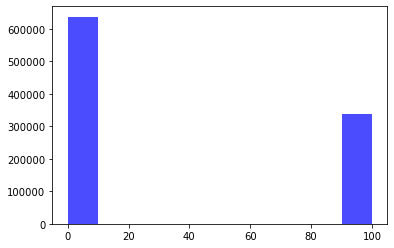

In [29]:
import matplotlib.pyplot as plt

plt.hist(df_model['precipprob'], bins=10, color='blue', alpha=0.7)
plt.show()

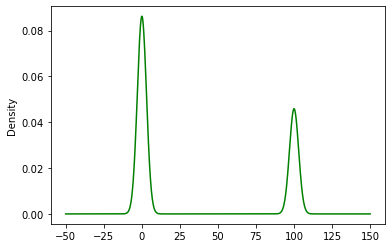

In [30]:
df_model['precipprob'].plot(kind='density', color='green')
plt.show()

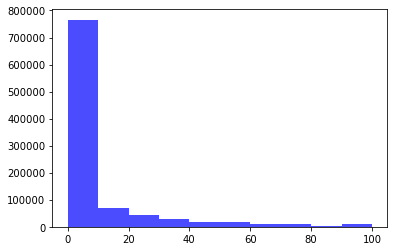

In [31]:
plt.hist(df_model['precipcover'], bins=10, color='blue', alpha=0.7)
plt.show()

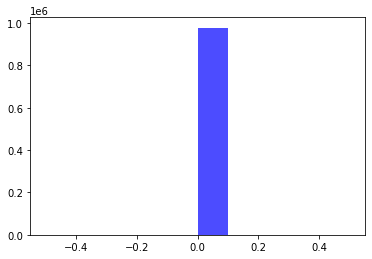

In [32]:
plt.hist(df_model['snow'], bins=10, color='blue', alpha=0.7)
plt.show()

#tolgo

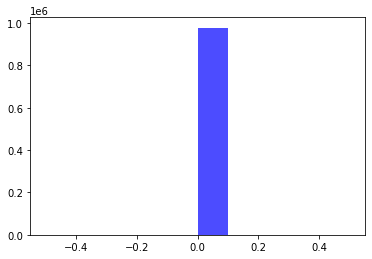

In [33]:
plt.hist(df_model['snowdepth'], bins=10, color='blue', alpha=0.7)
plt.show()

#tolgo

In [34]:
df_model = df_model[['District Code', 'Neighborhood Code', 'Parking Facility Length', 'Parking Facility Type Description', 
                     'Number of Parking Spaces', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility']]

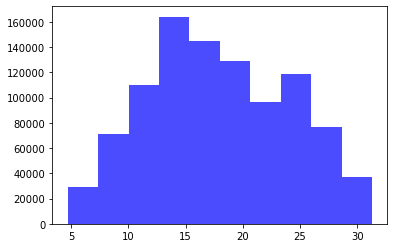

In [35]:
plt.hist(df_model['feelslike'], bins=10, color='blue', alpha=0.7)
plt.show()

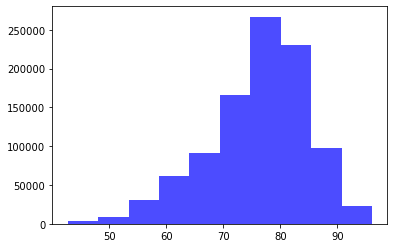

In [36]:
plt.hist(df_model['humidity'], bins=10, color='blue', alpha=0.7)
plt.show()

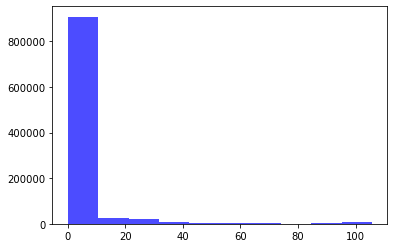

In [37]:
plt.hist(df_model['precip'], bins=10, color='blue', alpha=0.7)
plt.show()

In [38]:
df_model

,District Code,Neighborhood Code,Parking Facility Length,Parking Facility Type Description,Number of Parking Spaces,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,6.0,28.0,15.2,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,80.5,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
2,6.0,28.0,5.0,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,80.5,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
5,6.0,28.0,16.3,Línea,3.0,14.3,6.4,10.8,14.3,4.2,...,80.5,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
12,6.0,28.0,12.2,Batería,12.0,14.3,6.4,10.8,14.3,4.2,...,80.5,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
13,6.0,28.0,5.1,Línea,1.0,14.3,6.4,10.8,14.3,4.2,...,80.5,0.0,0.0,0.0,37.1,13.5,324.5,1032.0,46.3,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289984,5.0,26.0,4.0,Batería,10.0,16.9,6.8,11.5,16.9,4.4,...,78.7,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289985,5.0,26.0,6.7,Batería,4.0,16.9,6.8,11.5,16.9,4.4,...,78.7,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289989,5.0,26.0,5.6,Línea,1.0,16.9,6.8,11.5,16.9,4.4,...,78.7,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3
3289991,5.0,26.0,5.5,Batería,3.0,16.9,6.8,11.5,16.9,4.4,...,78.7,0.0,0.0,0.0,23.6,21.9,316.7,1027.6,30.2,13.3


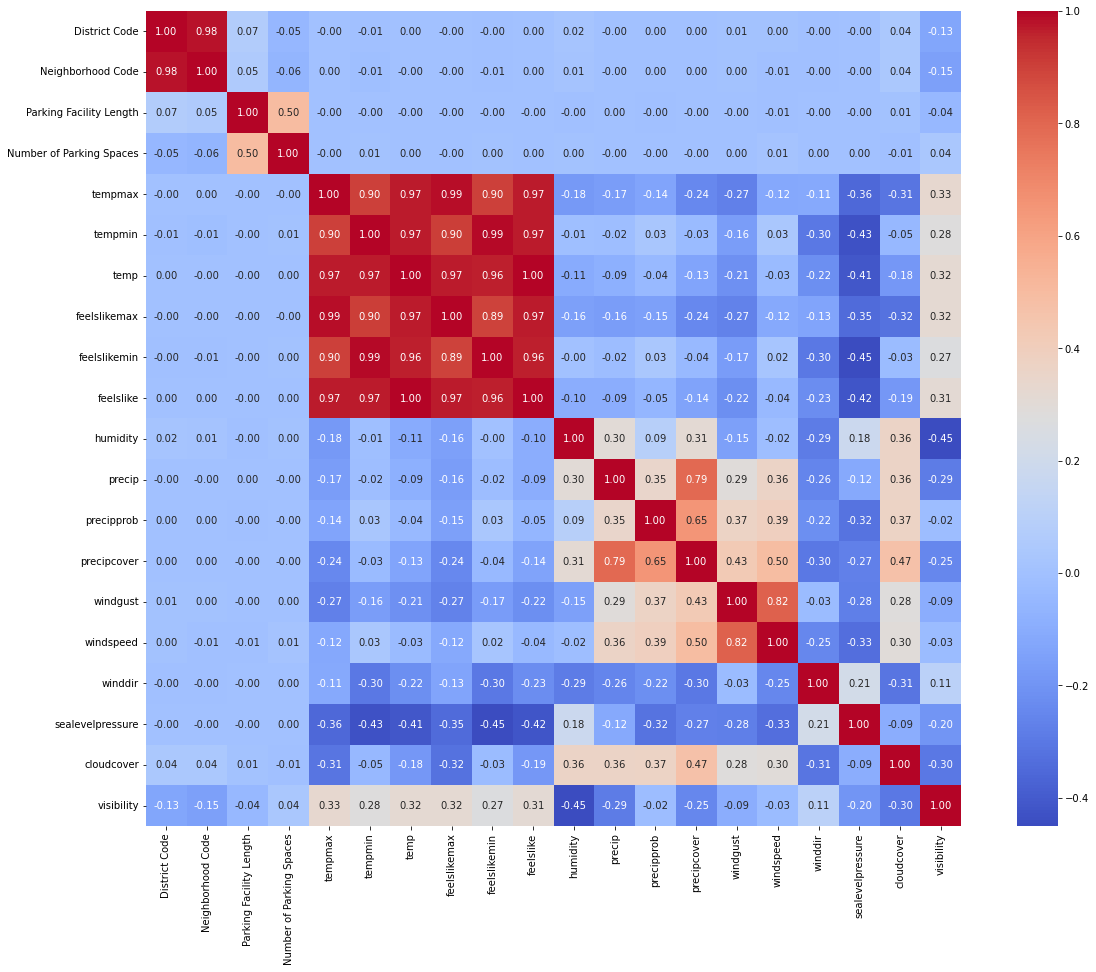

In [39]:
numeric_columns = df_model.select_dtypes(include='number')
corr = numeric_columns.corr()

#heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [40]:
df_model = df_model[['District Code', 'Neighborhood Code', 'Parking Facility Length', 'Parking Facility Type Description', 
                     'Number of Parking Spaces', 'temp', 'humidity', 'precipprob',
       'windgust', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility']]
df_model

,District Code,Neighborhood Code,Parking Facility Length,Parking Facility Type Description,Number of Parking Spaces,temp,humidity,precipprob,windgust,winddir,sealevelpressure,cloudcover,visibility
0,6.0,28.0,15.2,Línea,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
2,6.0,28.0,5.0,Línea,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
5,6.0,28.0,16.3,Línea,3.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
12,6.0,28.0,12.2,Batería,12.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
13,6.0,28.0,5.1,Línea,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289984,5.0,26.0,4.0,Batería,10.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289985,5.0,26.0,6.7,Batería,4.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289989,5.0,26.0,5.6,Línea,1.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289991,5.0,26.0,5.5,Batería,3.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3


In [41]:
df_dummies = pd.get_dummies(df_model)
df_dummies

,District Code,Neighborhood Code,Parking Facility Length,Number of Parking Spaces,temp,humidity,precipprob,windgust,winddir,sealevelpressure,cloudcover,visibility,Parking Facility Type Description_Alternativa,Parking Facility Type Description_Batería,Parking Facility Type Description_Chaflán,Parking Facility Type Description_Línea,Parking Facility Type Description_Parrilla
0,6.0,28.0,15.2,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False
2,6.0,28.0,5.0,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False
5,6.0,28.0,16.3,3.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False
12,6.0,28.0,12.2,12.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,True,False,False,False
13,6.0,28.0,5.1,1.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289984,5.0,26.0,4.0,10.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False
3289985,5.0,26.0,6.7,4.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False
3289989,5.0,26.0,5.6,1.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,False,False,True,False
3289991,5.0,26.0,5.5,3.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False


In [42]:
df_dummies.columns

Index(['District Code', 'Neighborhood Code', 'Parking Facility Length',
       'Number of Parking Spaces', 'temp', 'humidity', 'precipprob',
       'windgust', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'Parking Facility Type Description_Alternativa',
       'Parking Facility Type Description_Batería',
       'Parking Facility Type Description_Chaflán',
       'Parking Facility Type Description_Línea',
       'Parking Facility Type Description_Parrilla'],
      dtype='object')

In [43]:
df_dummies = df_dummies[['District Code', 'Neighborhood Code', 'Parking Facility Length',
       'temp', 'humidity', 'precipprob',
       'windgust', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'Parking Facility Type Description_Alternativa',
       'Parking Facility Type Description_Batería',
       'Parking Facility Type Description_Chaflán',
       'Parking Facility Type Description_Línea',
       'Parking Facility Type Description_Parrilla', 'Number of Parking Spaces'
        ]]
df_dummies

,District Code,Neighborhood Code,Parking Facility Length,temp,humidity,precipprob,windgust,winddir,sealevelpressure,cloudcover,visibility,Parking Facility Type Description_Alternativa,Parking Facility Type Description_Batería,Parking Facility Type Description_Chaflán,Parking Facility Type Description_Línea,Parking Facility Type Description_Parrilla,Number of Parking Spaces
0,6.0,28.0,15.2,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False,1.0
2,6.0,28.0,5.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False,1.0
5,6.0,28.0,16.3,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False,3.0
12,6.0,28.0,12.2,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,True,False,False,False,12.0
13,6.0,28.0,5.1,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3,False,False,False,True,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289984,5.0,26.0,4.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False,10.0
3289985,5.0,26.0,6.7,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False,4.0
3289989,5.0,26.0,5.6,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,False,False,True,False,1.0
3289991,5.0,26.0,5.5,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3,False,True,False,False,False,3.0


In [44]:
df_dummies=df_dummies.to_numpy()
df_dummies.shape

(977508, 17)

In [45]:
ix = range(0,16)
iy = 16
X = df_dummies[:,ix]
Y = df_dummies[:,iy]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=0)

print("Dimensions of X_train: " + str(X_train.shape))
print("Dimensions of Y_train: " + str(Y_train.shape))
print("Dimensions of X_test: " + str(X_test.shape))
print("Dimensions of Y_test: " + str(Y_test.shape))

Dimensions of X_train: (654930, 16)
Dimensions of Y_train: (654930,)
Dimensions of X_test: (322578, 16)
Dimensions of Y_test: (322578,)


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scalerX = preprocessing.MinMaxScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
Y_pred = model.predict(X_test)

In [52]:
# Performance evaluation
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 18.841178469592183
R-squared (R2): 0.5317665491074817


In [53]:
from sklearn.ensemble import RandomForestRegressor  

# creation of Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42) 

# Model Training
model.fit(X_train, Y_train)

# Prediction and test
predictions = model.predict(X_test)

In [54]:
# Performance evaluation
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.6471816353653175
R-squared (R2): 0.909361696991776


In [ ]:
MAE = mean_absolute_error(Y_test, predictions)

RMSE = np.sqrt(mean_squared_error(Y_test, predictions))

print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)

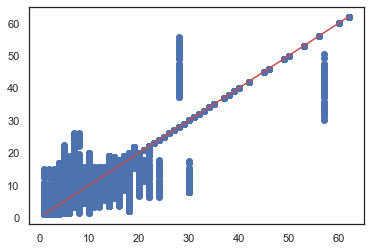

In [56]:
#scatterplot predicted values vs real values 

import numpy as np 
#Scatter plot of prediction and test
sns.set_theme(style="white")
fig, ax = plt.subplots()
ax.plot(Y_test,predictions,'bo')
ax.plot([np.min(Y_test),np.max(Y_test)],[np.min(Y_test),np.max(Y_test)],'r')

In [ ]:
"""
I see that there is a trend line showing a strong linear relationship between the predicted values and the actual values, 
which is consistent with a high R2 value. 
However, there are also points that deviate from the trend line, which could be outliers 
or could indicate areas where the model is not as accurate.
"""

In [57]:
residual_RF = Y_test - predictions
#sns.set_theme(style="whitegrid")
#sns.residplot(x=predictions, y=residual_RF, lowess=True, color="b")

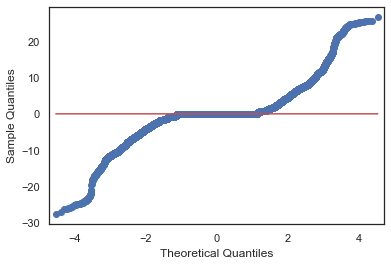

In [58]:
#qq-plot dei residui
import statsmodels.api as sm
sm.qqplot(residual_RF,line='q')
plt.show()

In [ ]:
"""
Many of the residuals do not align on the red line, which represents a theoretical normal distribution.
The residuals tend to deviate significantly from the line, especially at the extremes,
suggesting that the distribution of residuals is heavily influenced by outliers
and that the residuals may not be normally distributed.
This is a sign that the model may not have a good fit for all the data,
particularly for values that are very far from the average.
"""

In [ ]:
#therefore I study the outliers of both the target variable and the predictors

In [59]:
#outliers of the target variable

Q1 = df_model['Number of Parking Spaces'].quantile(0.25)
Q3 = df_model['Number of Parking Spaces'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_model[(df_model['Number of Parking Spaces'] < lower_limit) | (df_model['Number of Parking Spaces'] > upper_limit)]
outliers

,District Code,Neighborhood Code,Parking Facility Length,Parking Facility Type Description,Number of Parking Spaces,temp,humidity,precipprob,windgust,winddir,sealevelpressure,cloudcover,visibility
66,6.0,29.0,34.7,Batería,18.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
181,6.0,32.0,24.0,Batería,21.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
197,6.0,31.0,25.2,Batería,18.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
201,6.0,31.0,31.4,Batería,25.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
214,6.0,32.0,24.9,Batería,19.0,10.8,80.5,0.0,37.1,324.5,1032.0,46.3,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289878,5.0,26.0,30.6,Batería,21.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289904,5.0,26.0,48.3,Batería,33.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289936,5.0,26.0,31.0,Batería,30.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3
3289976,5.0,26.0,100.0,Batería,34.0,11.5,78.7,0.0,23.6,316.7,1027.6,30.2,13.3


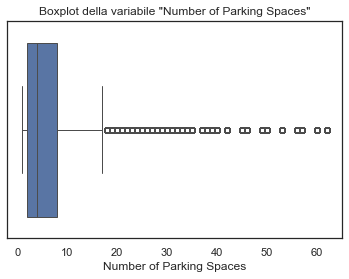

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot
sns.boxplot(x=df_model['Number of Parking Spaces'])
plt.title('Boxplot variable "Number of Parking Spaces"')
plt.show()